In [43]:
#https://github.com/arnaldog12/Machine_Learning/blob/master/Regress%C3%A3o%20Linear.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
df = pd.read_csv('measures.csv', sep=',')
df.head()

,Gender,Height,Weight,Height (cm),Weight (kg)
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499762,93.598619


(10000, 1) (10000, 1)


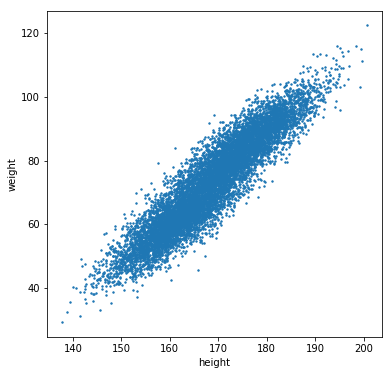

In [45]:
X = df['Height (cm)'].values.reshape(-1, 1)
y = df['Weight (kg)'].values.reshape(-1, 1)

print(X.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(X, y, s=2)
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

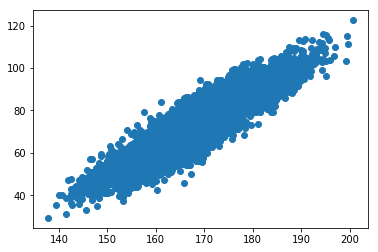

In [47]:
plt.scatter(X_train,y_train)

Text(0, 0.5, 'WEIGHT')

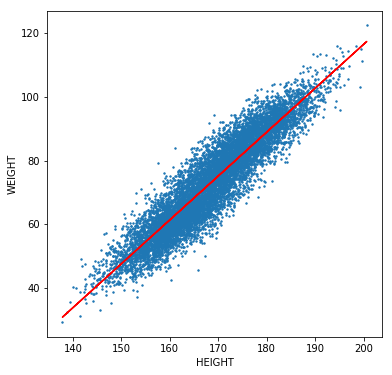

In [48]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)



plt.figure(figsize=(6, 6))
plt.scatter(X, y, s=2)
plt.plot(X, reg.predict(X), c='red')
plt.xlabel('HEIGHT')
plt.ylabel('WEIGHT')

In [49]:
acc=reg.score(X_test,y_test)
acc

0.8582071262816843

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

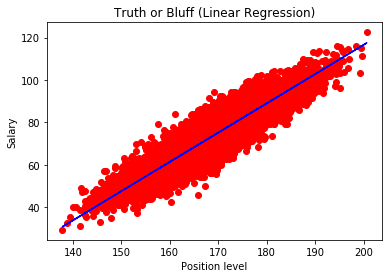

In [51]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

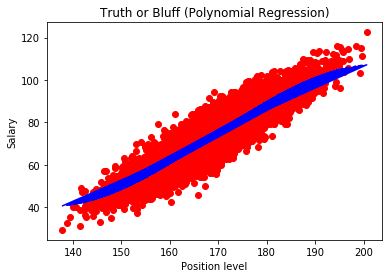

In [52]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

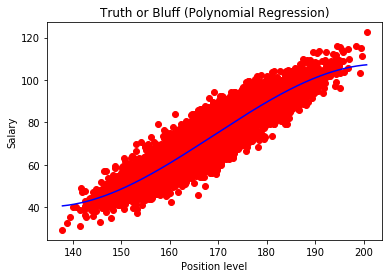

In [53]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [54]:
#linear regression
predictions = reg.predict(X_test)

In [55]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.3829772194692875
MSE: 30.14678595858549
RMSE: 5.4906088877815264


In [56]:
print('R2: ', metrics.r2_score(y_test, predictions))

R2:  0.8582071262816843


In [57]:
#polynomial regression
y_poly_pred = lin_reg_2.predict(X_poly)

In [58]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse)
print('R2:',r2)

MAE: 4.3829772194692875
MSE: 30.14678595858549
RMSE: 5.49379336203008
R2: 0.8576954078291297


In [ ]:
#logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.preprocessing import StandardScaler
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
X_test = standard_Scaler.transform(X_test)

In [42]:
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(y_train)
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 751 3672 7574 ... 4060 2074 6107]
continuous
[[53.87063537]
 [71.11351236]
 [95.75998875]
 ...
 [73.69779443]
 [62.04368468]
 [85.47971819]]
multiclass
multiclass
